# Statistcial Analysis of Telecom Plans

# Table of contents
* [Project description](#description) 
* [Goal](#goal)
* [Hypothesis](#hypothesis)
* [Description of the plans](#description_of_plans)
* [Description of the data](#description_of_data)
* [1 Gerneral information of Data](#description_of_data)
    * [1.1 Conclusion](#con11)
* [2 Data Processing](#data_processing)
    * [2.1 Data conversion](#data_con)
    * [2.2 Duplicates](#duplicates)
    * [2.3 Converting Data](#data_conversion)
* [3 Calculation](#calc)
    * [3.1 Messages per month](#message_month)
    * [3.2 Calls per month](#calls_month)
    * [3.3 Internet](#internet_used)
    * [3.4 Merging data](#merge_data)
    * [3.5 Monthly Profit](#profit)
    * [3.6 Conclusion](#conclusion)
* [4 EDA](#eda)
    * [4.1 messages](#message)
    * [4.2 calls](#calls)
    * [4.3 Minutes](#min)
    * [4.4 Data](#data)
    * [4.5 Outlier](#outlier)
    * [4.6 Conclusion](#con11)
* [5 Hypothesis Testing](#testing)
    * [Test1](#test1)
    * [Tes2](#tes2)
* [6 Conclusion](#con_end)

# Project description<a class="anchor" id="description"></a>


You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

# Goal <a class="anchor" id="goal"></a>
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

# Hypothesis <a class="anchor" id="hypothesis"></a>

1: The average revenue from users of Ultimate and Surf calling plans differs.

2:  The average revenue from users in NY-NJ area is different from that of the users from other regions.

# Description of the plans<a class="anchor" id="description_of_plans"></a>
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

##### Surf
1. Monthly charge: $20

2. 500 monthly minutes, 50 texts, and 15 GB of data

3. After exceeding the package limits:
    * 1 minute: 3 cents
    * 1 text message: 3 cents
    * 1 GB of data: $10

##### Ultimate
1. Monthly charge: $70

2. 3000 monthly minutes, 1000 text messages, and 30 GB of data

3. After exceeding the package limits:
    * 1 minute: 1 cent
    * 1 text message: 1 cent
    * 1 GB of data: $7

# Description of the data<a class="anchor" id="description_of_data"></a>
Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

The users table (data on users):

    * user_id — unique user identifier
    * first_name — user's name
    * last_name — user's last name
    * age — user's age (years)
    * reg_date — subscription date (dd, mm, yy)
    * churn_date — the date the user stopped using the service (if the value is missing, 
      the calling plan was being used when this database was extracted)
    * city — user's city of residence
    * plan — calling plan name
    
The calls table (data on calls):

    * id — unique call identifier
    * call_date — call date
    * duration — call duration (in minutes)
    * user_id — the identifier of the user making the call
    * The messages table (data on texts):
    * id — unique text message identifier
    * message_date — text message date
    * user_id — the identifier of the user sending the text

The internet table (data on web sessions):

    * id — unique session identifier
    * mb_used — the volume of data spent during the session (in megabytes)
    * session_date — web session date
    * user_id — user identifier

The plans table (data on the plans):
 
    * plan_name — calling plan name
    * usd_monthly_fee — monthly charge in US dollars
    * minutes_included — monthly minute allowance
    * messages_included — monthly text allowance
    * mb_per_month_included — data volume allowance (in megabytes)
    * usd_per_minute — price per minute after exceeding the package limits (e.g., if the
      package includes 100 minutes, the 101st minute will be charged)
    * usd_per_message — price per text after exceeding the package limits
    * usd_per_gb — price per extra gigabyte of data after exceeding the package limits 
      (1 GB = 1024 megabytes)


### General Information of Data<a class="anchor" id="general_info"></a>

In [1]:
# libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
# import stats from scipy
from scipy import stats
import warnings

import warnings
warnings.filterwarnings(action='ignore', category=np.VisibleDeprecationWarning) 

In [2]:
# reading the files
try: 
    df_calls = pd.read_csv('megaline_calls.csv')
    df_internet = pd.read_csv('megaline_internet.csv')
    df_message = pd.read_csv('megaline_messages.csv')
    df_plan = pd.read_csv('megaline_plans.csv')
    df_user = pd.read_csv('megaline_users.csvv')
except: 
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_message = pd.read_csv('/datasets/megaline_messages.csv')
    df_plan = pd.read_csv('/datasets/megaline_plans.csv')
    df_user = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
# learning more about the user data
df_user.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_user.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


The user data we can see how there is no missing data present  except for churn_date which is the only column with missing data. We also need to change the data type to datetime for churn_date.

In [6]:
#learn about the calls
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


No missing data, but data type needs to be changed from object to datetime.

In [9]:
# learn more about the messages
df_message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
df_message.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [11]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


No missing values but datetype needs to change from object to datetime for message_date.

In [12]:
# plans 
df_plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
df_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


The data looks good, no missing values.

In [14]:
# the internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [15]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


No missing values, but need to change session_date data type to datetime.

#### Conclusion:<a class="anchor" id="con11"></a>

Overall, the data seems to be clean and there is no missing data excpet for one column in df_cells. In addition, there are data types that need to be changed to data time for the date columns.

### Data Prepocessing<a class="anchor" id="data_processing"></a>

#### Date conversion<a class="anchor" id="data_con"></a>

In [16]:
 #converting data types to datetime

df_user['reg_date'] = pd.to_datetime(df_user['reg_date'],format= "%Y-%m-%d")
df_user['churn_date'] = pd.to_datetime(df_user['churn_date'],format= "%Y-%m-%d")
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format= "%Y-%m-%d")
df_message['message_date'] = pd.to_datetime(df_message['message_date'],format= "%Y-%m-%d")
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format= "%Y-%m-%d")

In [17]:
#rounding number of calls 
df_calls['total_min'] = np.ceil((df_calls['duration'].values))

In [18]:
df_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


#### Duplicates<a class="anchor" id="duplicates"></a>

In [19]:
#find duplicates
store = []
for dups in [df_user, df_message, df_calls, df_internet, df_plan]:
    print(store.append(dups.duplicated().sum()))

None
None
None
None
None


There are no duplictes present.

#### Converting Data <a class="anchor" id="data_conversion"></a>

In [20]:
df_calls.head()

,id,user_id,call_date,duration,total_min
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


In [21]:
# create new columns for to add month 
df_calls['month'] = df_calls['call_date'].dt.month_name()
df_user['month'] = df_user['reg_date'].dt.month_name()
df_internet['month'] = df_internet['session_date'].dt.month_name()
df_message['month'] = df_message['message_date'].dt.month_name()

In [22]:
#using regular expressions to make id more unique.
new_id = np.vectorize(lambda x: re.sub('.*_',  '' ,   x))
df_calls["id"] = new_id(df_calls["id"])
df_message["id"] = new_id(df_message["id"])
df_internet["id"] = new_id(df_internet["id"])
df_calls.head()

,id,user_id,call_date,duration,total_min,month
0,93,1000,2018-12-27,8.52,9.0,December
1,145,1000,2018-12-27,13.66,14.0,December
2,247,1000,2018-12-27,14.48,15.0,December
3,309,1000,2018-12-28,5.76,6.0,December
4,380,1000,2018-12-30,4.22,5.0,December


In [23]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
total_min    137735 non-null float64
month        137735 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 6.3+ MB


In [24]:
#need to convert the id data type to ints from objects.
df_calls['id'] = df_calls['id'].astype('int')
df_message['id'] = df_message['id'].astype('int')
df_internet['id'] = df_internet['id'].astype('int')

### Calculation <a class="anchor" id="calc"></a>

#### Messages per month <a class="anchor" id="message_month"></a>

In [25]:
# number of messages per month

#pivot table
messages_month = df_message.pivot_table(
    index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
messages_month.columns = ['user_id','month','messages_per_month']
messages_month.head()

,user_id,month,messages_per_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


In [26]:
messages_month.describe()

,user_id,messages_per_month
count,1806.000000,1806.000000
mean,1245.091916,42.110188
std,139.583315,33.122931
min,1000.000000,1.000000
25%,1126.250000,17.000000
50%,1245.000000,34.000000
75%,1362.000000,59.000000
max,1497.000000,266.000000


We can see that there are 1806 messages per month. The mean average of messages are 42, and the max number someone sent a messages in a month is 266, and the minimum is 1.

#### Calls per month<a class="anchor" id="calls_month"></a>

In [27]:
df_calls

,id,user_id,call_date,duration,total_min,month
0,93,1000,2018-12-27,8.52,9.0,December
1,145,1000,2018-12-27,13.66,14.0,December
2,247,1000,2018-12-27,14.48,15.0,December
3,309,1000,2018-12-28,5.76,6.0,December
4,380,1000,2018-12-30,4.22,5.0,December
...,...,...,...,...,...,...
137730,199,1499,2018-11-21,8.72,9.0,November
137731,200,1499,2018-10-20,10.89,11.0,October
137732,201,1499,2018-09-21,8.12,9.0,September
137733,202,1499,2018-10-10,0.37,1.0,October


In [28]:
# number of calls made per month and minutes counts
calls_month = df_calls.pivot_table(index = ['user_id','month'],
                                   values = 'duration', 
                                   aggfunc = ['count','sum']).reset_index()
calls_month.columns =["user_id","month","calls_made","minutes"]
calls_month.head()

,user_id,month,calls_made,minutes
0,1000,December,16,116.83
1,1001,August,27,171.14
2,1001,December,56,392.93
3,1001,November,64,404.59
4,1001,October,65,374.11


In [29]:
calls_month.describe()

,user_id,calls_made,minutes
count,2258.000000,2258.000000,2258.000000
mean,1247.175819,60.998671,411.492586
std,143.344211,31.770869,219.290453
min,1000.000000,1.000000,0.000000
25%,1122.000000,39.000000,258.075000
50%,1246.000000,60.000000,404.270000
75%,1370.000000,80.000000,543.335000
max,1499.000000,205.000000,1431.220000


We have the number of calls made are 2258 and the avergae number of calls are 60. In addition, we can see that the minumum calls made are 1 made, and max calls are 205. 

#### Internet used<a class="anchor" id="internet_used"></a>

In [30]:
# total interent used
internet_use = df_internet.pivot_table(
    index=['user_id','month'],values='mb_used',aggfunc=['sum']).reset_index()
internet_use.columns= ['user_id', 'month', "data_used"]
internet_use.head()

,user_id,month,data_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49


The total interent used is 2277 MB. The mean number of data used is 16882 MB. The min data used is 92MB, and max amount of data used is 70931 MB.

In [31]:
internet_use['gb_month'] = np.ceil((internet_use['data_used']) / 1024).astype(int)
internet_use.describe()

,user_id,data_used,gb_month
count,2277.000000,2277.000000,2277.000000
mean,1244.925780,16882.197501,16.989021
std,142.544823,7869.784848,7.693683
min,1000.000000,92.310000,1.000000
25%,1121.000000,12347.720000,13.000000
50%,1243.000000,16873.740000,17.000000
75%,1367.000000,21041.520000,21.000000
max,1499.000000,70931.590000,70.000000


There seems to be mean average of 16882 MB used monthly, min of 92 MB, and max of 70931MB. In addition, there is 17 GB used monthly, min of 1GB used, and 71GB max used monthly.

#### Merging data<a class="anchor" id="merge_data"></a>

In [34]:
# merging the user to data
data = df_user[['user_id','plan','city']] # only getting the 3 columns we want
data_user = data.merge(df_plan, left_on='plan', right_on='plan_name') #merging user with df_plans

In [35]:
data = (calls_month
              .merge(messages_month, how='outer', on=['user_id','month'])
              .merge(internet_use, how='outer', on=['user_id','month'])
              .merge(data_user, on='user_id')  
             )
data.head()

,user_id,month,calls_made,minutes,messages_per_month,data_used,gb_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,December,16.0,116.83,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,August,27.0,171.14,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,December,56.0,392.93,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,November,64.0,404.59,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,October,65.0,374.11,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


In [36]:
# checking for missing data 
data.isna().sum()

user_id                    0
month                      0
calls_made                35
minutes                   35
messages_per_month       487
data_used                 16
gb_month                  16
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [37]:
# filling in missing data
data.fillna(0, inplace = True)

From the data seem we will be filling in missing data with 0 since the missing data which could be present is probably 0 values for the call_count, minutes used, data_used, and messages_total.

#### The monthy profit<a class="anchor" id="profit"></a>

In [39]:
#calculate the total profits 
def profit(money):
    '''
    #Surf
    Monthly charge: $20
    500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
    1 minute: 3 cents
    1 text message: 3 cents
    1 GB of data: $10
    
    #Ultimate
    Monthly charge: $70
    3000 monthly minutes, 1000 text messages, and 30 GB of data
    After exceeding the package limits:
    1 minute: 1 cent
    1 text message: 1 cent
    1 GB of data: $7
    '''
    if money['plan_name'] == 'surf':
        money['usd_monthly_pay'] = 20
        if money['minutes'] > 500:
            minute_charge = 0.03*(money['minutes'] - 500)
        else:
            minute_charge = 0
        if money['messages_per_month'] > 50:
            message_charge = 0.03*(money['messages_per_month'] - 50)
        else:
            message_charge = 0
        if money['gb_month'] > 15:
            gb_charge = 10 * (money['gb_month'] - 15)
        else:
            gb_charge = 0
    elif money['plan_name'] == 'ultimate':
        money['usd_monthly_pay'] = 70
        if money['minutes'] > 3000:
            minute_charge = 0.01*(money['minutes'] - 3000)
        else:
            minute_charge = 0
        if money['messages_per_month'] > 1000:
            message_charge = 0.01*(money['messages_per_month'] - 1000)
        else:
            message_charge = 0
        if money['gb_month'] > 30:
            gb_charge = 7 * (money['gb_month'] - 30)
        else:
            gb_charge = 0
                
    total_profit = money['usd_monthly_pay'] + minute_charge + message_charge + gb_charge
    return total_profit
           

In [40]:
#adding a new column called monthly_profit in dataframe and applying the profit function above
data["monthly_profit"] = data.apply(profit,axis=1)
data.head()

,user_id,month,calls_made,minutes,messages_per_month,data_used,gb_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_profit
0,1000,December,16.0,116.83,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,August,27.0,171.14,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,20.00
2,1001,December,56.0,392.93,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,60.00
3,1001,November,64.0,404.59,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,60.00
4,1001,October,65.0,374.11,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,90.09


In [43]:
data_surf = data.query("plan_name == 'surf'")
data_surf.describe()

,user_id,calls_made,minutes,messages_per_month,data_used,gb_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.0,1573.0,1573.0,1573.0,1573.0,1.573000e+03,1.573000e+03,1573.000000
mean,1242.755245,59.811825,404.762390,31.159568,16558.283490,16.670693,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,60.327346
std,139.227939,32.017989,221.664397,33.566717,8013.513327,7.847522,0.0,0.0,0.0,0.0,0.0,1.041165e-17,1.041165e-17,55.262605
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,20.000000
25%,1120.000000,39.000000,255.470000,3.000000,11986.520000,12.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,20.000000
50%,1245.000000,60.000000,401.760000,24.000000,16829.310000,17.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,40.150000
75%,1358.000000,79.000000,543.680000,47.000000,20999.610000,21.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,80.000000
max,1499.000000,205.000000,1431.220000,266.000000,70931.590000,70.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,588.637200


Surf Users:
The surf users have made on average 
- 60 calls montly
- spennt 404 minutes on the phone.
- sent 31 messages per month
- Used 16558 MB of data.
- 16.6 GB a month
- mean profit 60

In [44]:
data_ultimate = data.query("plan_name == 'ultimate'")
data_ultimate.describe()

,user_id,calls_made,minutes,messages_per_month,data_used,gb_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.0,720.0,720.0,720.0,7.200000e+02,7.200000e+02,720.000000
mean,1253.330556,60.626389,406.193083,37.551389,17214.699694,17.306944,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,72.313889
std,150.915644,33.242994,227.246499,34.767179,7851.897435,7.670108,0.0,0.0,0.0,0.0,0.0,1.735929e-18,1.735929e-18,11.395108
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
25%,1126.000000,36.000000,246.290000,7.000000,12666.955000,13.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
50%,1241.500000,61.000000,398.585000,30.000000,16858.340000,17.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
75%,1401.000000,80.000000,532.227500,61.000000,21014.527500,21.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
max,1497.000000,191.000000,1292.090000,166.000000,46595.330000,46.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,182.000000


Ultimate Users:

The Ultimate users have made on average 
- 60 calls
- spent 406 minutes.
- made 37 messages per month
- used 17214 MB of data.
- 17.3 GB used a month
- mean profit 72

#### Conclusion<a class="anchor" id="conclusion"></a>

Overall, the monthly profits for the surf plan seem to be very similar to the ultimate plan. Both plans mean calls, minutes spent, GB used, and messages sent a month are similar, but it is MB which is the one that is different from both plans and ultimate plan has higher MB use and ultimate has higher mean profit then surf.

### EDA<a class="anchor" id="eda"></a>

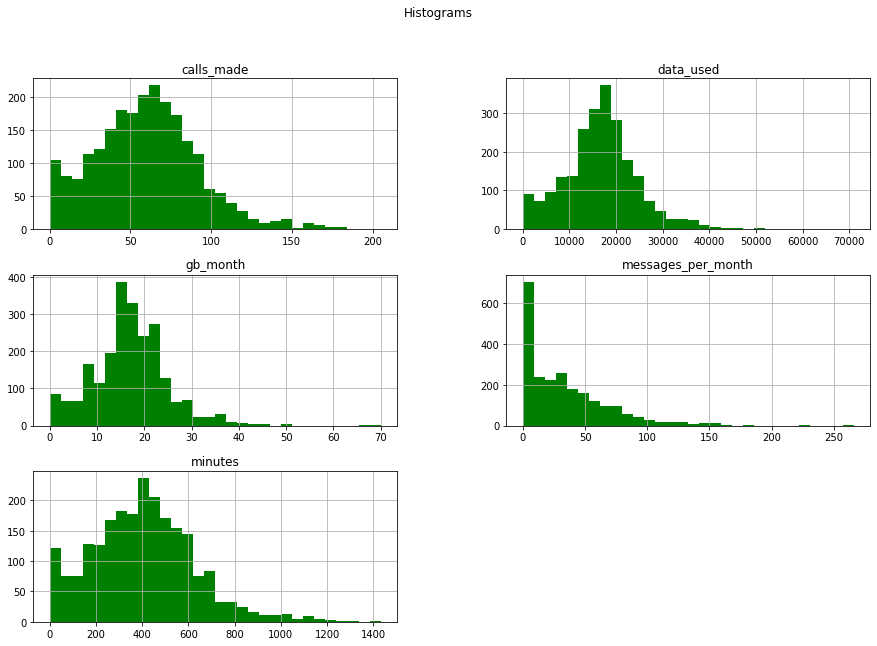

In [45]:
#histogram for data
data[['calls_made', 'minutes', 'messages_per_month', 'data_used', 'gb_month']].hist(bins=30, figsize=(15, 10), color = 'g')
plt.suptitle('Histograms');


There is some outlier present and some of the trends seem to be right-skewed.

#### messages <a class="anchor" id="messages"></a>

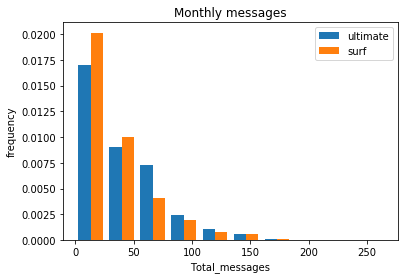

In [46]:
import matplotlib.pyplot as plt
plt.hist([data_ultimate['messages_per_month'],data_surf['messages_per_month']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_messages')
plt.title('Monthly messages')
plt.ylabel('frequency');

Both the ultimate and surf plans seem to present the same kind of trend in the graph. We can see both surf and ultimate had a relativly large amount of people who dont send messages monthly, but it is surf plan that has as higher amount then ultimate for fewer of messages sent. 

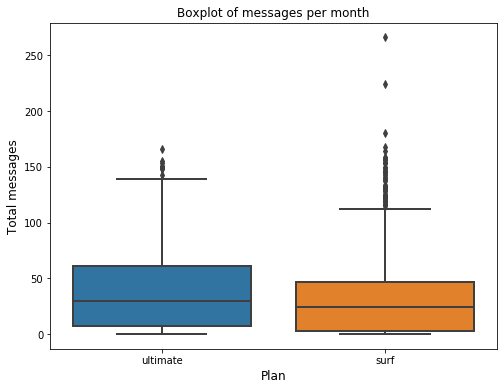

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="messages_per_month", data = data, linewidth =2, ax=ax)
plt.title("Boxplot of messages per month", fontdict={"size":12})
plt.ylabel("Total messages", fontdict={"size":12})
plt.xlabel("Plan", fontdict={"size":12})
plt.show()

We can see that there are some outliers present for surf plan which is ranging from 120-280 range. As for the Ultimate outliers are present arounf 140-175 range. The Ultimate plan also has a higher mean and median then surf plan.

In [48]:
#the number of messages for mean, median, std in a month for surf
print('The average number of messages monthly for surf plan {}'.format(
    data_surf['messages_per_month'].mean()))
print('The median number of messages monthly for surf plan is {}'.format(
    data_surf['messages_per_month'].median()))
print('The std of messages monthly for surf plan is {}'.format(
    data_surf['messages_per_month'].std()))

print()
#the number of messages for mean, median, std in a month for ultimate
print('The average number of messages monthly for ultimate plan is {}'.format(
    data_ultimate['messages_per_month'].mean()))
print('The median number of messages monthly for ultimate plan is {}'.format(
    data_ultimate['messages_per_month'].median()))
print('The std for messages monthly for ultimate plan is {}'.format(
    data_ultimate['messages_per_month'].std()))

The average number of messages monthly for surf plan 31.15956770502225
The median number of messages monthly for surf plan is 24.0
The std of messages monthly for surf plan is 33.566717473569064

The average number of messages monthly for ultimate plan is 37.55138888888889
The median number of messages monthly for ultimate plan is 30.0
The std for messages monthly for ultimate plan is 34.76717911404574


#### calls<a class="anchor" id="calls"></a>

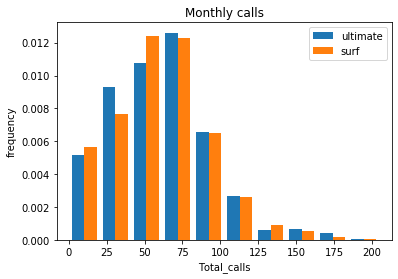

In [49]:
#histograph for ultimate and surf calls
plt.hist([data_ultimate['calls_made'],data_surf['calls_made']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_calls')
plt.title('Monthly calls')
plt.ylabel('frequency');

We can see from the histogram that the data is skeweked to the right side. Both plans seem to have the same trend and make more sorter calls then longer ones, but it seems that ultimate users seem to make more shorter calls then surf plan. 

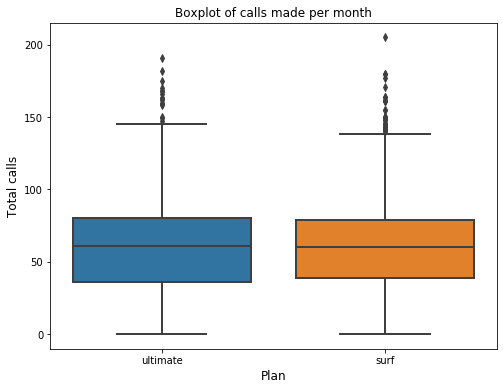

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="calls_made", data = data, linewidth =2, ax=ax)
plt.title("Boxplot of calls made per month", fontdict={"size":12})
plt.ylabel("Total calls", fontdict={"size":12})
plt.xlabel("Plan", fontdict={"size":12})
plt.show()

We can see that both plans have outliers present ranging from 140- 250 for total messages. Alos both messages have around the same mean.

In [51]:
#the number of messages for mean, median, std in a month for surf
print('The average number of messages monthly for surf plan {}'.format(
    data_surf['calls_made'].mean()))
print('The median number of messages monthly for surf plan is {}'.format(
    data_surf['calls_made'].median()))
print('The std of messages monthly for surf plan is {}'.format(
    data_surf['calls_made'].std()))

print()
#the number of messages for mean, median, std in a month for ultimate
print('The average number of messages monthly for ultimate plan is {}'.format(
    data_ultimate['calls_made'].mean()))
print('The median number of messages monthly for ultimate plan is {}'.format(
    data_ultimate['calls_made'].median()))
print('The std for messages monthly for ultimate plan is {}'.format(
    data_ultimate['calls_made'].std()))

The average number of messages monthly for surf plan 59.811824539097266
The median number of messages monthly for surf plan is 60.0
The std of messages monthly for surf plan is 32.01798854349269

The average number of messages monthly for ultimate plan is 60.62638888888889
The median number of messages monthly for ultimate plan is 61.0
The std for messages monthly for ultimate plan is 33.24299415063124


#### Minutes<a class="anchor" id="min"></a>

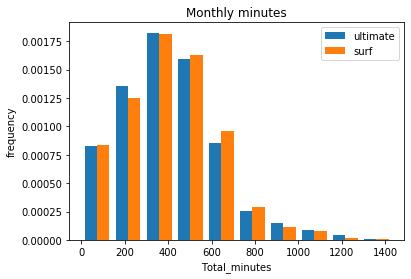

In [52]:
#histograph for ultimate and surf minutes
plt.hist([data_ultimate['minutes'],data_surf['minutes']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_minutes')
plt.title('Monthly minutes')
plt.ylabel('frequency');

The histogram is skeweked to the right side. In addition, we can see that the trends for total_minutes spent seem to be very close for both surf and ultimate plan. We can see that utimate plan users semt to user more smaller amounts of minutes then surf plan. 

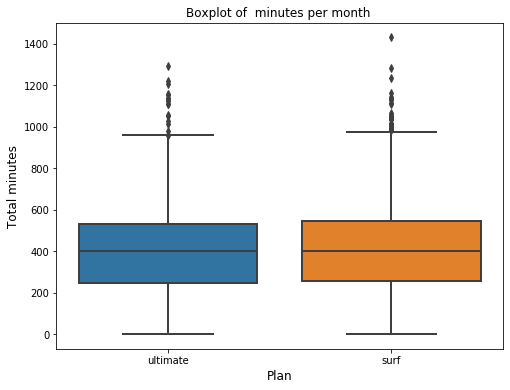

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="minutes", data = data, linewidth =2, ax=ax)
plt.title("Boxplot of  minutes per month ", fontdict={"size":12})
plt.ylabel("Total minutes", fontdict={"size":12})
plt.xlabel("Plan", fontdict={"size":12})
plt.show()

We can see that both plans have outliers present. Surf plan seems to have more outlier present ranging from 1000 - 1400 range and a higher mean then ultimate. While Ultimate seems to start from 990- 1350. 

In [54]:
#the number of messages for mean, median, std in a month for surf
print('The average number of messages monthly for surf plan {}'.format(
    data_surf['minutes'].mean()))
print('The median number of messages monthly for surf plan is {}'.format(
    data_surf['minutes'].median()))
print('The std of messages monthly for surf plan is {}'.format(
    data_surf['minutes'].std()))

print()
#the number of messages for mean, median, std in a month for ultimate
print('The average number of messages monthly for ultimate plan is {}'.format(
    data_ultimate['minutes'].mean()))
print('The median number of messages monthly for ultimate plan is {}'.format(
    data_ultimate['minutes'].median()))
print('The std for messages monthly for ultimate plan is {}'.format(
    data_ultimate['minutes'].std()))

The average number of messages monthly for surf plan 404.76239033693577
The median number of messages monthly for surf plan is 401.75999999999993
The std of messages monthly for surf plan is 221.6643969849924

The average number of messages monthly for ultimate plan is 406.19308333333333
The median number of messages monthly for ultimate plan is 398.58500000000004
The std for messages monthly for ultimate plan is 227.24649920771657


#### Data <a class="anchor" id="data"></a>

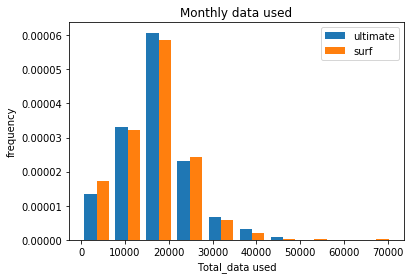

In [55]:
#histograph for ultimate and surf MB used
plt.hist([data_ultimate['data_used'],data_surf['data_used']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_data used')
plt.title('Monthly data used')
plt.ylabel('frequency');

The graph seems to look like a normal distribution with skewness to the right side. In addition, we can see that there sharp peak for both plans around 20000 MB for users of both plans. Also, fewer users are using more data after 25000MB and we can see outliers who do use the most data being surf plan users.

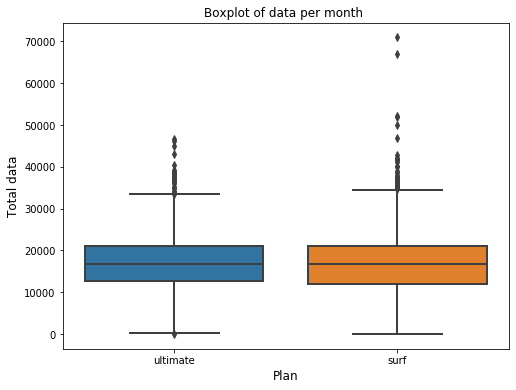

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan_name", y="data_used", data = data, linewidth =2, ax=ax)
plt.title("Boxplot of data per month ", fontdict={"size":12})
plt.ylabel("Total data", fontdict={"size":12})
plt.xlabel("Plan", fontdict={"size":12})
plt.show()

Both plans mean seem very close to each other. We can see that Surf plan seem to have more outliers than Ultimate. Surf plan oultiers range from 35000-70000, and Sultimate is from 33000-49000.

In [57]:
#the number of messages for mean, median, std in a month for surf
print('The average number of data used monthly for surf plan {}'.format(
    data_surf['data_used'].mean()))
print('The median number of data used monthly for surf plan is {}'.format(
    data_surf['data_used'].median()))
print('The std of messages data used for surf plan is {}'.format(
    data_surf['data_used'].std()))

print()
#the number of messages for mean, median, std in a month for ultimate
print('The average number of data used monthly for ultimate plan is {}'.format(
    data_ultimate['data_used'].mean()))
print('The median number of data used monthly for ultimate plan is {}'.format(
    data_ultimate['data_used'].median()))
print('The std for data used monthly for ultimate plan is {}'.format(
    data_ultimate['data_used'].std()))

The average number of data used monthly for surf plan 16558.283490146216
The median number of data used monthly for surf plan is 16829.309999999998
The std of messages data used for surf plan is 8013.513326751753

The average number of data used monthly for ultimate plan is 17214.699694444447
The median number of data used monthly for ultimate plan is 16858.34
The std for data used monthly for ultimate plan is 7851.897434624215


#### Outliers<a class="anchor" id="outlier"></a>

In [75]:
# Using IQR for outliers
df = data[['calls_made', 'minutes', 'messages_per_month', 'data_used', 'monthly_profit']]
iqr = df.quantile(0.75) - df.quantile(0.25)
upper = df.quantile(0.75) + iqr*1.5
lower = df.quantile(0.25) - iqr*1.5

In [78]:
#upper outlier cutoff
upper.head()

calls_made              140.5000
minutes                 977.4300
messages_per_month      123.0000
data_used             34145.9600
monthly_profit          141.2677
dtype: float64

In [79]:
#lower outlier cutoff 
lower.head()

calls_made            -23.5000
minutes              -187.8500
messages_per_month    -69.0000
data_used            -910.3600
monthly_profit        -48.7795
dtype: float64

In [59]:
# filtered dataset using z-score.
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True, inplace=False)
df_clean

,calls_made,minutes,messages_per_month,data_used,monthly_profit
0,16.0,116.83,11.0,1901.47,70.00
1,27.0,171.14,30.0,6919.15,20.00
2,56.0,392.93,44.0,19369.18,60.00
3,64.0,404.59,36.0,18504.30,60.00
4,65.0,374.11,53.0,22330.49,90.09
...,...,...,...,...,...
2186,0.0,0.00,42.0,21346.95,70.00
2187,0.0,0.00,61.0,13039.91,20.33
2188,0.0,0.00,72.0,17128.26,40.66
2189,0.0,0.00,76.0,13093.55,20.78


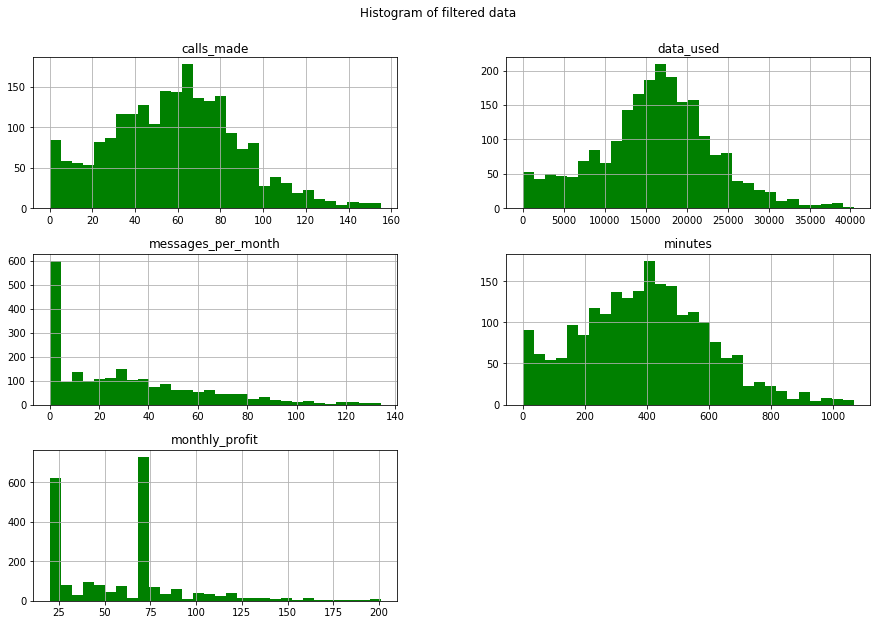

In [64]:
# plot histogram of filtered data
df_clean[['calls_made', 'minutes', 'messages_per_month', 'data_used', 'monthly_profit']].hist(bins=30, figsize=(15, 10), color = 'g')
plt.suptitle('Histogram of filtered data', y=0.95);

The data is cleaner and have a more normal distribution shape and are not as right skewed as before.

In [66]:
# extract filtered data for the surf plan using z-score
ultimate_data = data.query("plan == 'ultimate'")
ultimate_plan = ultimate_data[['calls_made', 'minutes', 'messages_per_month', 'data_used', 'monthly_profit']]

ultimate_plan1 = ultimate_plan[(np.abs(stats.zscore(ultimate_plan)) < 3).all(axis=1)]
ultimate_plan1 = ultimate_plan1.reset_index(drop=True, inplace=False)
ultimate_plan1.describe()

,calls_made,minutes,messages_per_month,data_used,monthly_profit
count,677.000000,677.000000,677.000000,677.000000,677.000000
mean,58.970458,394.634018,34.302806,16365.651566,70.568685
std,29.979860,204.853477,31.274291,6906.710640,3.677063
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,247.030000,5.000000,12496.090000,70.000000
50%,60.000000,397.310000,28.000000,16438.420000,70.000000
75%,78.000000,516.250000,56.000000,20259.490000,70.000000
max,159.000000,1054.850000,139.000000,35206.680000,105.000000


For Ultimate plan on average make monthly:

- 58 calls made
- 394 minutes
- 34 messages per month
- 16365 data used
- 70 dollars profit

In [62]:
# extract filtered data for the surf plan using z score
surf_data = data.query("plan == 'surf'")
surf_plan = surf_data[['calls_made', 'minutes', 'messages_per_month', 'data_used', 'monthly_profit']]

surf_plan1 = surf_plan[(np.abs(stats.zscore(surf_plan)) < 3).all(axis=1)]
surf_plan1 = surf_plan1.reset_index(drop=True, inplace=False)
surf_plan1.describe()

,calls_made,minutes,messages_per_month,data_used,monthly_profit
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,58.357427,394.849204,28.301724,16039.802155,55.143632
std,30.313364,210.005175,28.408758,7071.134553,43.351986
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,38.000000,247.825000,2.000000,11928.992500,20.000000
50%,59.000000,393.975000,23.000000,16679.935000,40.000000
75%,78.000000,534.540000,44.000000,20620.942500,80.000000
max,155.000000,1066.080000,130.000000,35662.920000,223.123600


For surf plan on average make monthly:
- 58 calls made
- 394 minutes used
- 28 messages
- 16039 MB of data used
- monthly profit of 55 dollars

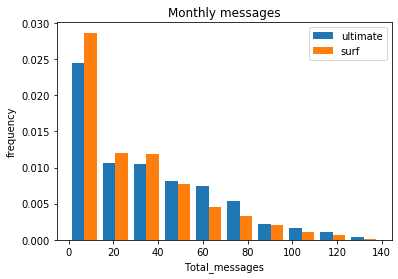

In [67]:
plt.hist([ultimate_plan1['messages_per_month'],surf_plan1['messages_per_month']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_messages')
plt.title('Monthly messages')
plt.ylabel('frequency');

Both surf and ultimate plan have a similar trend with each other. In addition, we can see that the surf plan tends to have a high amount of fewer messages than Ultimate. Also, as the message total increase, we can see that Ultimate plan has more total messages than surf but they seem to have fewer amount of more messages.

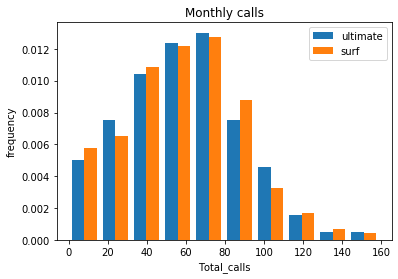

In [68]:
#histograph for ultimate and surf calls
plt.hist([ultimate_plan1['calls_made'],surf_plan1['calls_made']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_calls')
plt.title('Monthly calls')
plt.ylabel('frequency');

The distribution looks more like a normal distribution with mean-centered around 60. There seems to be a lot of calls made from surf than ultimate. With ultimate have a relatively large amount of small calls than large.

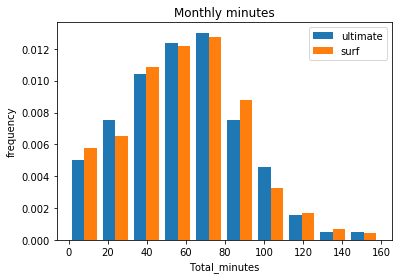

In [69]:
#histograph for ultimate and surf minutes
plt.hist([ultimate_plan1['calls_made'],surf_plan1['calls_made']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('Total_minutes')
plt.title('Monthly minutes')
plt.ylabel('frequency');

Both surf and ultimate plan have fewer amounts of minutes used from the 0-80 range and less minutes from 100-160.

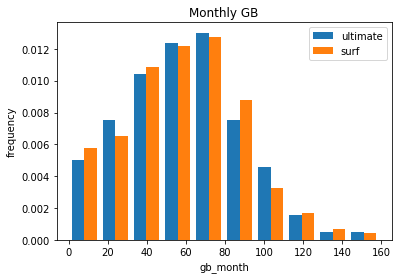

In [70]:
#histograph for ultimate and surf minutes
plt.hist([ultimate_plan1['calls_made'],surf_plan1['calls_made']],label= ['ultimate','surf'], density = True)
plt.legend()
plt.xlabel('gb_month')
plt.title('Monthly GB')
plt.ylabel('frequency');

Both surf and ultimate plans have a mean average around 17 GB used, There is a large abount of GB used for sufs around 20-25BG and Ultimate seems more GB used around the 25-35 GB range.

In [71]:
# average revenue for users of ultimate and surf plan
ultimate_avg = ultimate_plan1['monthly_profit'].sum() / len(ultimate_plan1['monthly_profit'])
surf_avg = surf_plan1['monthly_profit'].sum() / len(surf_plan1['monthly_profit'])
diff = (ultimate_avg - surf_avg) / ultimate_avg * 100
print('The average revenue for ultimate plan is ${:.2f}'.format(ultimate_avg))
print('The average revenue for surf plan is ${:.2f}'.format(surf_avg))
print('The difference between ultimate plan revenue and surf plan revenue is {:.2f}%'.format(diff))

The average revenue for ultimate plan is $70.57
The average revenue for surf plan is $55.14
The difference between ultimate plan revenue and surf plan revenue is 21.86%


#### Conclusion<a class="anchor" id="con11"></a>

After cleaning our data and removing outliers we found the average revenue for the surf plan is smaller than the ultimate plan. We can see there is a 21.86% difference between both plans and Ultimate plans has a higher revenue of 70 dollars than surf who generates a revenue of 55.14 dollars a month.

### Hypothesis  Testing<a class="anchor" id="Testing"></a>

There are 2 hyothesis we will be testing:

1: The average revenue from users of Ultimate and Surf calling plans differs.

2: The average revenue from users in NY-NJ area is different from that of the users from other regions.

#### Test 1<a class="anchor" id="test1"></a>
    
HO: The average revenue from users of Ultimate and Surf calling plans are the same. 

HA: The average revenue from users of Ultimate and Surf calling plans differs. 

We will be setting out $\alpha$ = 0.05

In [73]:
# hypothesis testing
ultimate = ultimate_plan1['monthly_profit']
surf = surf_plan1['monthly_profit']

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 1.8545858602874146e-40
We reject the null hypohesis


With our p-value being smaller than our alpha at a significance level of 0.05 we can state that our p-value is statistically significant. In addition, we can state that we reject the null in favor of the alternative for the average revenue from users of Ultimate and Surf calling plans is different. 

#### Test 2<a class="anchor" id="tes2"></a>


HO: The average revenue from users in NY-NJ area is same from that of the users from other regions.

HA: The average revenue from users in NY-NJ area is different from that of the users from other regions.


In [74]:
# hypothesis testing
NY_NJ = data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_profit'] # revenue of users in NY-NJ
not_NY_NJ = data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_profit'] # revenue of users not in NY-NJ

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results1 = st.ttest_ind(NY_NJ, not_NY_NJ, equal_var = False)
print('The p-value is: {}'.format(results1.pvalue))

# compare the p-value with the significance level
if (results1.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 0.031214139070912725
We reject the null hypohesis


With our p-value of 0.03 being less then our alpha level of 0.05 we can confidently starte that we reject the null hypothesis in favor of the alternative which is the average revenue from users in NY-NJ area is different from that of the users from other regions.

### Conclusion<a class="anchor" id="con_final"></a>

First, we did some data pre-processing to clean format the data and convert data types to the appropriate categories such as data time form object. In addition, we rounded up each call and made and merged the data from each of the individual columns into one data frame which has the monthly profits which we can analyze. 

Further, after merging the data we were able to do EDA analysis on messages, calls, the internet, and data used to see any trends between the plans. From the analysis, there were outliers present that had taken care of that to make our data less skewed. 

From the analysis, we found that the Ultimate plan on average makes a better profit than the Surf plan. This is shown from the monthly profit that Ultime plan makes on average being 70.57 dollars and Surf being 55.14 dollars, which is a 21% difference.

Hypothesis testing:

1) The average profit from users of Ultimate and Surf plans differs;

2) The average profit from users in NY-NJ area is different from that of the users from other regions.

From hypothesis testing 1 we found the average revenue from users of Ultimate and Surf calling plans differs and therefore reject the null hypothesis.

For testing the second hypothesis we found that the average revenue from users in the NY-NJ area is different from that of the users from other regions, and reject the null hypothesis.

